**Time Series References**

* https://stackoverflow.com/questions/3986345/how-to-find-the-local-minima-of-a-smooth-multidimensional-array-in-numpy-efficien
* https://stackoverflow.com/questions/53551273/how-to-detect-multiple-plateaus-and-ascents-and-descent-in-the-time-series-data
* https://dsp.stackexchange.com/questions/47227/need-a-better-step-detection-algorithm
* https://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array


**Basic References**

* https://www.geeksforgeeks.org/numpy-diff-in-python/
* https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
* https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.signal.find_peaks_cwt.html
* https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

In [3]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
from math import *

# Exemplo de achar pontos de máximo e plotar no gráfico

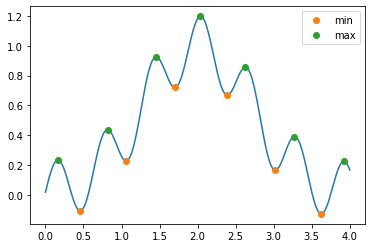

In [9]:
# https://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array

# example data with some peaks:
x = np.linspace(0,4,1000)

data = .2 * np.sin(10*x) + np.exp(-np.abs(2-x)**2)

# that's the line, you need:
a = np.diff(np.sign(np.diff(data))).nonzero()[0] + 1 # local min+max
b = (np.diff(np.sign(np.diff(data))) > 0).nonzero()[0] + 1 # local min
c = (np.diff(np.sign(np.diff(data))) < 0).nonzero()[0] + 1 # local max


# graphical output...
from pylab import *
plot(x,data)
plot(x[b], data[b], "o", label="min")
plot(x[c], data[c], "o", label="max")
legend()
show()

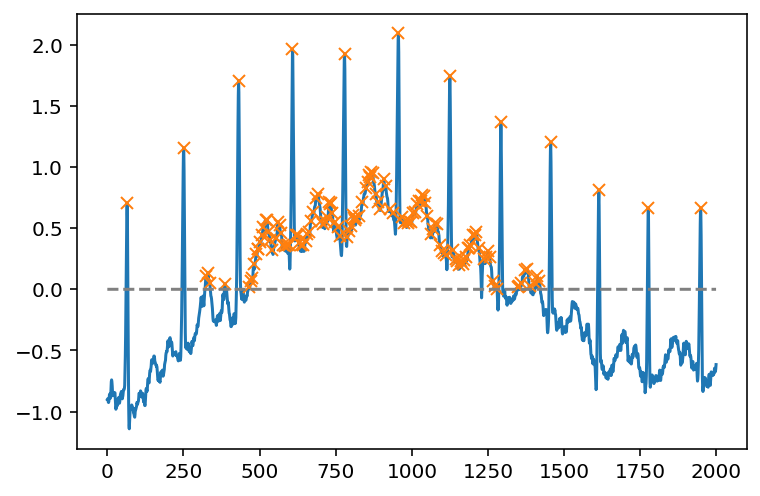

In [21]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

[186 180 177 171 177 169 167 164 158 162 172]


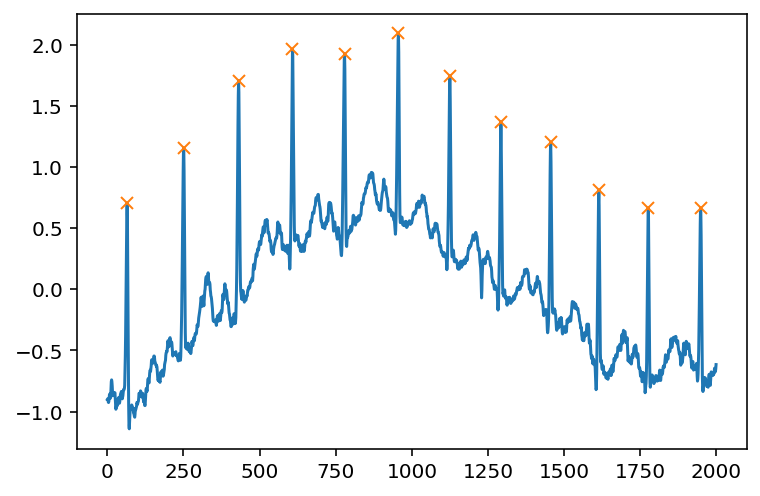

In [22]:
peaks, _ = find_peaks(x, distance=150)
# difference between peaks is >= 150
print(np.diff(peaks))
# prints [186 180 177 171 177 169 167 164 158 162 172]

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

[ -8.3  -1.1   3.1   1.    1.    1.   27.  -32.    3.   20.  -22.  -29.
   6.   -9. ]
{'maxima_number': 3, 'minima_number': 3, 'maxima_locations': [7, 10, 13], 'minima_locations': [2, 8, 12]}


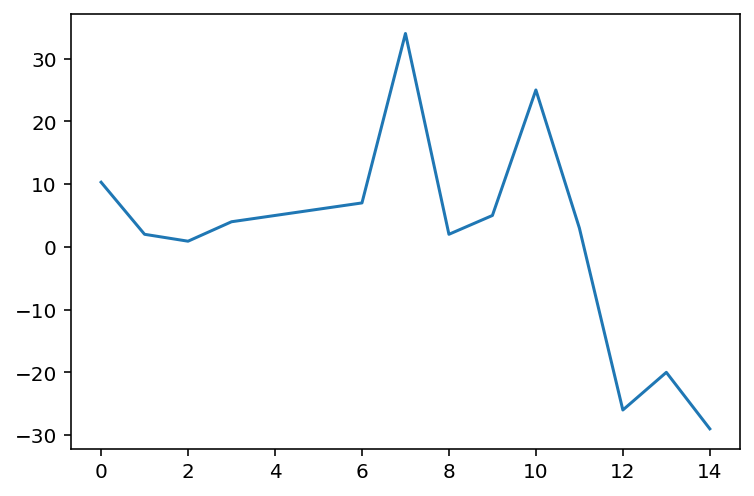

In [40]:
# cmp() function does not exist on Python 3.
# https://www.geeksforgeeks.org/python-cmp-function/
# https://stackoverflow.com/questions/22490366/how-to-use-cmp-in-python-3

from matplotlib import pyplot

a=np.array([10.3,2,0.9,4,5,6,7,34,2,5,25,3,-26,-20,-29],dtype=np.float)

gradients=np.diff(a)
print(gradients)

maxima_num=0
minima_num=0
max_locations=[]
min_locations=[]
count=0

def cmp(x, y):
    return int(x > y) - int(x < y)

for i in gradients[:-1]:
        count+=1
        if (cmp(i,0)>0) & (cmp(gradients[count],0)<0) & (i != gradients[count]):
            maxima_num+=1
            max_locations.append(count)     

        if ((cmp(i,0)<0) & (cmp(gradients[count],0)>0) & (i != gradients[count])):
            minima_num+=1
            min_locations.append(count)

turning_points = {'maxima_number':maxima_num,
                  'minima_number':minima_num,
                  'maxima_locations':max_locations,
                  'minima_locations':min_locations}  

print(turning_points)

pyplot.plot(a)
pyplot.show()

# Exemplo de uso do pacote argrelextrema

In [12]:
from scipy.signal import argrelextrema

# Defines the array randomly
ts_array = np.random.random(12)

# for local maxima
maiores_valores = argrelextrema(x, np.greater)

# for local minima
menores_valores = argrelextrema(x, np.less)

In [13]:
ts_array

array([0.39278077, 0.57457419, 0.38999823, 0.17892075, 0.2753935 ,
       0.81094131, 0.60594394, 0.81892686, 0.45173004, 0.57172366,
       0.2994761 , 0.13937308])

In [19]:
# Mostra o índice de todos os maiores valores
print(maiores_valores)

# Mostra os valores para os maiores ao invés do índice
ts_array[argrelextrema(ts_array, np.greater)[0]]

(array([ 2,  4,  7, 10], dtype=int64),)


array([0.57457419, 0.81094131, 0.81892686, 0.57172366])

In [20]:
# Mostra o índice de todos os menores valores
print(menores_valores)

# Mostra os valores para os menores ao invés do índice
ts_array[argrelextrema(ts_array, np.less)[0]]

(array([1, 3, 6, 8], dtype=int64),)


array([0.17892075, 0.60594394, 0.45173004])

# Outro exemplo usando um arquivo csv

In [52]:
df = pd.read_csv('Exemplos_series_temporais_achar_plateaul_mudancas_de_nivel_maximos_minimos.csv',
                 encoding = 'utf-8', 
                 delimiter=';')

df['dt_date_time'] = df['dt_date_time'].astype('datetime64[ns]')

df

,batch_name,dt_date_time,value_wit14007
0,NOBATCH,2019-10-23 00:00:00,-8.44
1,NOBATCH,2019-10-23 00:00:30,-8.36
2,NOBATCH,2019-10-23 00:00:39,-5.37
3,NOBATCH,2019-10-23 00:00:48,-8.49
4,NOBATCH,2019-10-23 00:03:06,-8.42
...,...,...,...
1117914,C021KA5104,2020-10-05 18:37:29,10057.20
1117915,C021KA5104,2020-10-05 18:37:38,10059.80
1117916,C021KA5104,2020-10-05 18:40:00,10059.90
1117917,C021KA5104,2020-10-05 18:41:33,10059.80


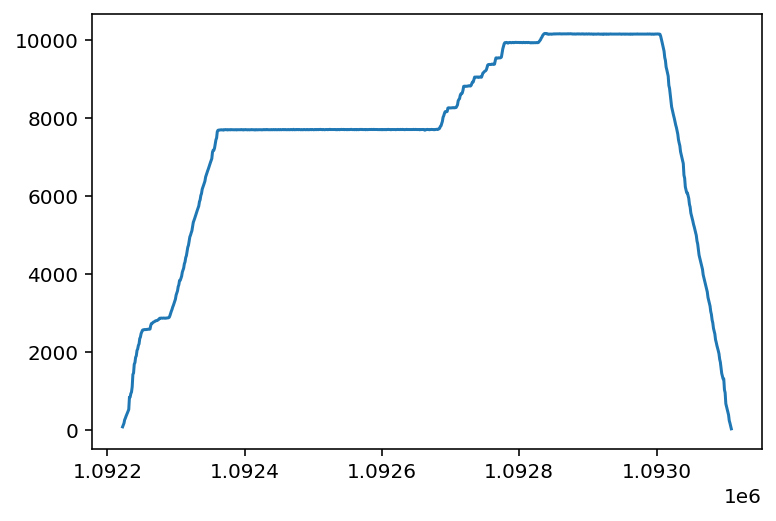

In [53]:
# Defining boolean test as a condition
#cond_lote = df['batch_name'] == 'C021K9O119'

# Creating new dataframe with previous condition
#df2 = pd.DataFrame(df.loc[cond_lote])

# Sets the start of the range for the time period
start = '2020-09-24 22:57:18'

# Sets the end of the range for the time period
end = '2020-09-25 05:32:47'

# Creates a dataframe with specific range of time from the original dataframe
df_ts = df.loc[(df['dt_date_time'] >= start) & (df['dt_date_time'] <= end)]

# Plots the mass pattern for the selected batch
ts = pd.Series(df_ts['value_wit14007'])
ts.plot()